In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [228]:
data = np.genfromtxt(fname='transistor.csv', delimiter=',')

### Actual data plot

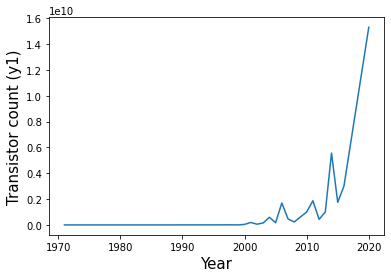

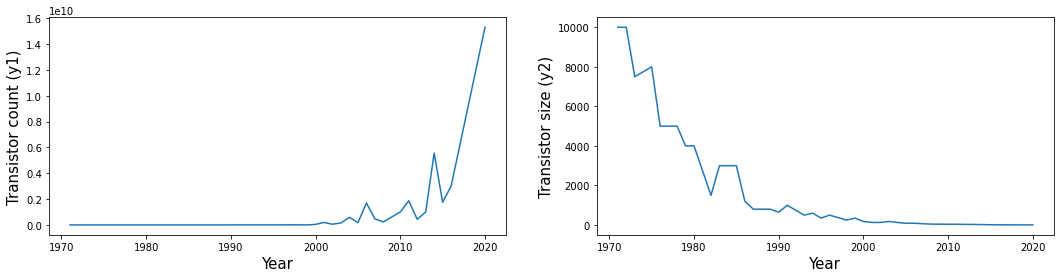

In [225]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(data[:,0], data[:,1])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Transistor count (y1)', fontsize=15)
plt.subplot(122)
plt.plot(data[:,0], data[:,2])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Transistor size (y2)', fontsize=15)
plt.show()

### Log value plot

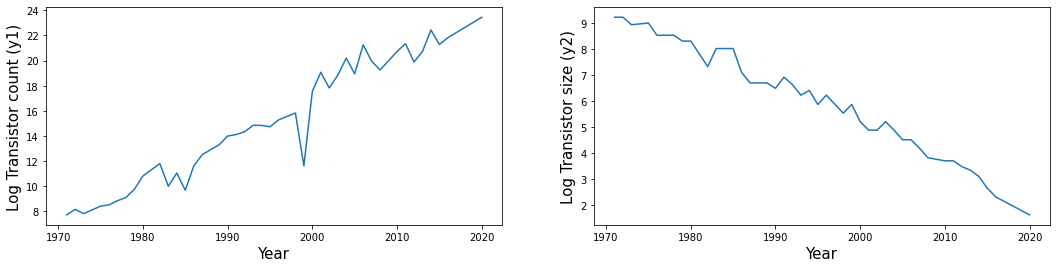

In [227]:
plt.figure(figsize=(18,4))
plt.subplot(121)
plt.plot(data[:,0], np.log(data[:,1]))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Log Transistor count (y1)', fontsize=15)
plt.subplot(122)
plt.plot(data[:,0], np.log(data[:,2]))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Log Transistor size (y2)', fontsize=15)
plt.show()

### Training loop

In [231]:
import numpy as np
def LinearRegressor(learning_rate,X_Val,Y_Val):
    Y = np.log(Y_Val)
    X_Val = 2000 - X_Val
    b0 = 1
    b1 = 1
    Y_pred = b0 + b1 * X_Val
    loss = np.mean((Y - Y_pred)**2)
#     print(np.mean((np.exp(Y) - np.exp(Y_pred))**2))
    while(1):
        oldError = loss
        gb0 = -1 * np.mean(Y-Y_pred)
        gb1 = -1 * np.mean((Y-Y_pred)*X_Val)
        
        b0 = b0 - learning_rate * gb0
        b1 = b1 - learning_rate * gb1
        
        Y_pred = b0 + b1 * X_Val
        loss = np.mean((Y - Y_pred)**2)
        
        residual = np.abs(loss - oldError)
        if(residual < 1e-5):
            break
    
#     print(np.mean((np.exp(Y) - np.exp(Y_pred))**2))
    return b0,b1


import numpy as np
def predict(x_test):
    
    ## FIll your Learning Rate here 
    ## TO DO
    learning_rate = 0.5e-4
    
    data_Assignment = np.genfromtxt("transistor.csv",delimiter=",")
    ## csv column Stored as ( x (year) , y1 (transistor_count) , y2(transistor Size))
    
    ##Split the Data into training and validation dataset to perform a validation on 
    #  on your model. However mention those errors and the validation in the PDF report
    #  Do not perform these validations here. 
    ## Note : Use only the training data set that you have used and pass them to the 
    #         function(LinearRegressor) Below. 
    
    ## Fill The row values which you have considered as validation data
    ## Fill the array as For Eg : count_IDX = [1,5,10,12,14]
    count_IDX = [0,6,12,18,24,36]    ##Validation data rows for y1
    size_IDX  = [0,6,12,18,24,36]    ##Validation data rows for y2
    
    data_copy_1 = data_Assignment.copy()
    data_copy_2 = data_Assignment.copy()
    
    ##Remove the validation data from current Dataset 
    TrainingDataSet_1     = np.delete(data_copy_1,count_IDX,axis=0) ## Training  Data for y1
    TrainingDataSet_2     = np.delete(data_copy_2,size_IDX,axis=0)  ## Training  Data for y2
    
    ## FIll your Name here 
    ## TO DO
    NAME  = "Ronak Dedhiya"
    ## Compute the parameters for Transistor Size 
    ## These parameters are the output of the Gradient Decent Algorithm
    b0_s,b1_s \
              =  LinearRegressor(learning_rate,TrainingDataSet_2[:,0],TrainingDataSet_2[:,2])
    ## Compute the parameters for Count
    ## These parameters are the output of the Gradient Decent Algorithm
    b0_c,b1_c \
          =  LinearRegressor(learning_rate,TrainingDataSet_1[:,0],TrainingDataSet_1[:,1])  
          
    
    # Compute the Predcited Values and save them in the corresponding arrays
    x_test = np.array(x_test)
    y1_predicted = np.exp(b0_c + b1_c * (2000 - x_test))
    y2_predicted = np.exp(b0_s + b1_s * (2000 - x_test))
    
    
    ### Do the Computations for Predictions and add them to y1_predicted and y2_predicted Arrays

    
    return NAME,y1_predicted,y2_predicted

In [229]:
data1 = data.copy()

In [235]:
a = predict(data1[[0,6,12,18,24,36],0])    
b = predict(data1[:,0])

In [250]:
print(np.mean((a[2] - data1[[0,6,12,18,24,36],2])**2))
print(np.mean((b[2] - data1[:,2])**2))



1238420.5912327815
432585.8427164235


Text(0.5, 1.0, 'Log Transisitor size(y2) vs Time')

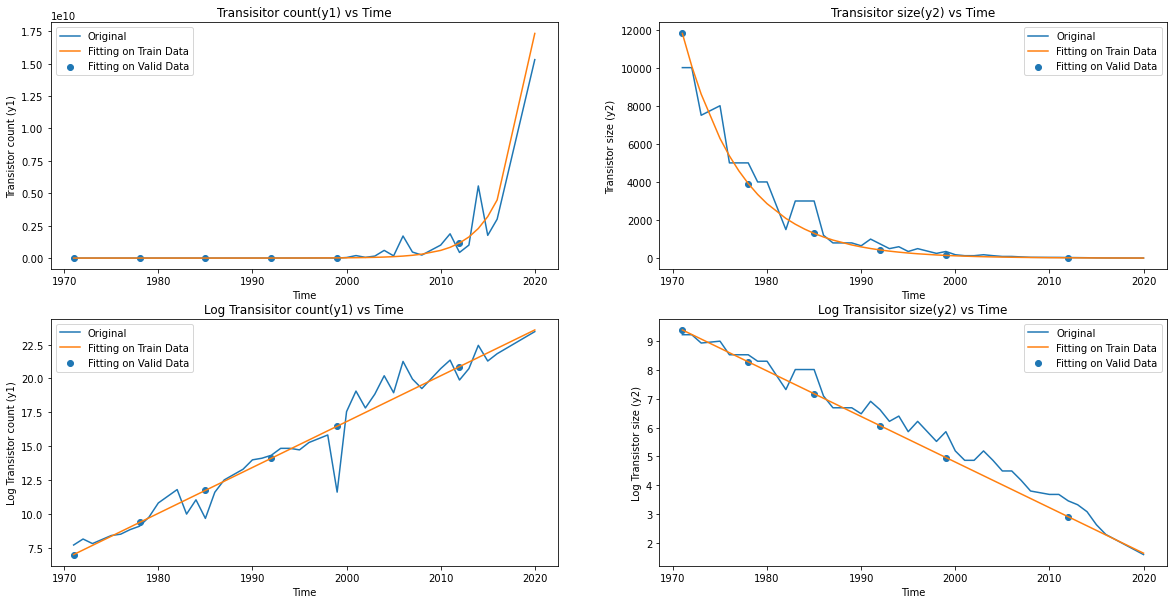

In [244]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.plot(data[:,0],data[:,1],label="Original")
plt.plot(data[:,0],b[1],label = "Fitting on Train Data")
plt.scatter(data[[0,6,12,18,24,36],0],a[1],label = "Fitting on Valid Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Transistor count (y1)")
plt.title("Transisitor count(y1) vs Time")
plt.subplot(222)
plt.plot(data[:,0],data[:,2],label="Original")
plt.plot(data[:,0],b[2],label = "Fitting on Train Data")
plt.scatter(data[[0,6,12,18,24,36],0],a[2],label = "Fitting on Valid Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Transistor size (y2)")
plt.title("Transisitor size(y2) vs Time")

plt.subplot(223)
plt.plot(data[:,0],np.log(data[:,1]),label="Original")
plt.plot(data[:,0],np.log(b[1]),label = "Fitting on Train Data")
plt.scatter(data[[0,6,12,18,24,36],0],np.log(a[1]),label = "Fitting on Valid Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel('Log Transistor count (y1)')
plt.title("Log Transisitor count(y1) vs Time")

plt.subplot(224)
plt.plot(data[:,0],np.log(data[:,2]),label="Original")
plt.plot(data[:,0],np.log(b[2]),label = "Fitting on Train Data")
plt.scatter(data[[0,6,12,18,24,36],0],np.log(a[2]),label = "Fitting on Valid Data")
plt.legend()
plt.xlabel("Time")
plt.ylabel('Log Transistor size (y2)')
plt.title("Log Transisitor size(y2) vs Time")


In [176]:
def FiniteDifference(scenario):
    
    #### --- DO NOT CHANGE ANYTHING BELOW [ END] ----- #######
    endTime = 0
    if(scenario == 0):
        endTime = 8
    else:
        endTime = 9
    
    start_time      = 0
    BoundaryValue_1 = 0
    BoundaryValue_2 = 50
    
    n = 100 ## NUmber of Divisions
    
    h = (endTime-0) / n   ## Time Step
    
    ##Declare Size of Matrix 
    A = np.zeros((n+1, n+1))      #### Size of the Matrix for n+1 DOF * n+1 DOF
    A[0, 0] = 1                   ### Imposing boundary condition for 1st DOF 
    A[n, n] = 1                   ### Imposing Boundary DOF for last DOF
    
    ## Declare B Vector
    b = np.zeros(n+1)
    
    b[0] = BoundaryValue_1       ### Dirichlet value for 1st DOF - DO not change 
    b[-1] = BoundaryValue_2      ### Dirichlet value for last DOF - Do not change
    
    #### --- DO NOT CHANGE ANYTHING BELOW [ END] ----- #######
    
    ##### NAME -- Write your name in the below format XXXXX_YYYYY
    NAME = "Ronak_Dedhiya"
    
    
    ## Fill the entries for A Matrix 
    ## Obtain the second difference formula for all the points ( except first and last ), then seperate the co-efficients alone 
    ## into a Matrix A and their unknowns into vector b 
    
    
    ## Fill Matrix A based on the co-efficient values
    for i in range(1,n,1):
        A[i,i-1] = 1/(h*h)
        A[i,i] = -2/(h*h)
        A[i,i+1] = 1/(h*h)
        b[i] = -9.81
#     print(A,b)    
    # Fill b vector
    # solve the linear equations  using numpy linalg solver to obtain answer y
    y = np.linalg.solve(A,b)
    
    
    
    ## using the obtained solution, use backward difference formula to obtain velocity at all points except for first point
    ## The last value of this array should have the velocity upon impact on the obstacle at end point
    velocity = np.zeros(n)
    velocity = (y[1:] - y[:-1])/h
        
    return velocity,y,NAME;
    
    

In [177]:
a = FiniteDifference(0)
b = FiniteDifference(1)

In [221]:
b[0]

array([ 49.25910556,  48.37620556,  47.49330556,  46.61040556,
        45.72750556,  44.84460556,  43.96170556,  43.07880556,
        42.19590556,  41.31300556,  40.43010556,  39.54720556,
        38.66430556,  37.78140556,  36.89850556,  36.01560556,
        35.13270556,  34.24980556,  33.36690556,  32.48400556,
        31.60110556,  30.71820556,  29.83530556,  28.95240556,
        28.06950556,  27.18660556,  26.30370556,  25.42080556,
        24.53790556,  23.65500556,  22.77210556,  21.88920556,
        21.00630556,  20.12340556,  19.24050556,  18.35760556,
        17.47470556,  16.59180556,  15.70890556,  14.82600556,
        13.94310556,  13.06020556,  12.17730556,  11.29440556,
        10.41150556,   9.52860556,   8.64570556,   7.76280556,
         6.87990556,   5.99700556,   5.11410556,   4.23120556,
         3.34830556,   2.46540556,   1.58250556,   0.69960556,
        -0.18329444,  -1.06619444,  -1.94909444,  -2.83199444,
        -3.71489444,  -4.59779444,  -5.48069444,  -6.36

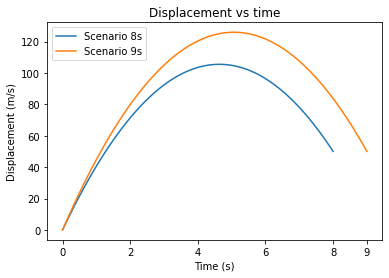

In [218]:
plt.plot(np.arange(0,8+8/100,8/100),a[1],label = "Scenario 8s")
plt.plot(np.arange(0,9+9/100,9/100),b[1],label = "Scenario 9s")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m/s)")
plt.xticks([0,2,4,6,8,9])
plt.title("Displacement vs time")
plt.show()